In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [5]:
# Load the dataset (update path if necessary)
df = pd.read_csv('train.csv')
df.head(3)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Drop non-numeric or irrelevant features
df = df.drop(columns=['Id'])  # Drop Id column since it's not useful for predictions


In [8]:
# Handle missing values (fill with median for simplicity)
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

<bound method NDFrame.describe of 0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64>


<Axes: xlabel='SalePrice', ylabel='Count'>

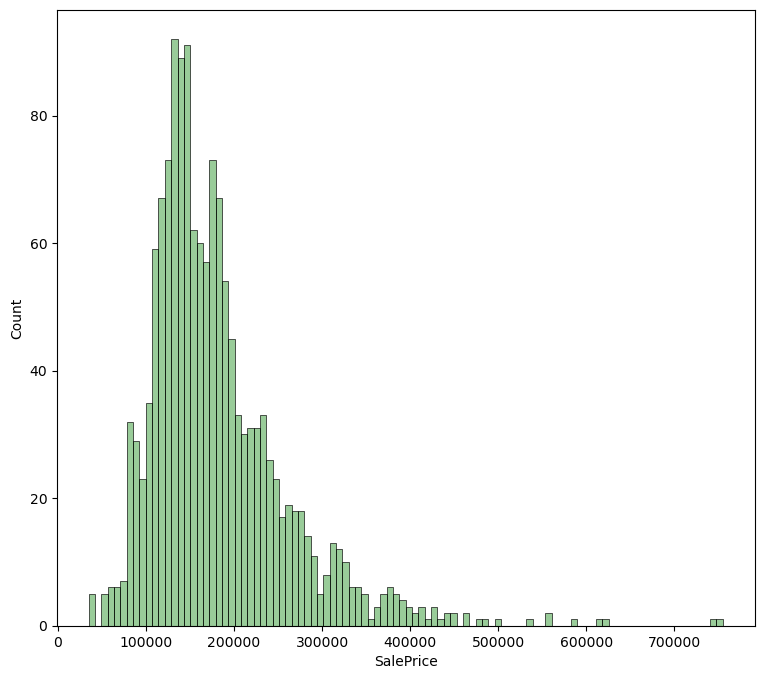

In [61]:
print(data['SalePrice'].describe)
plt.figure(figsize=(9, 8))
sns.histplot(data['SalePrice'], color='g', bins=100, alpha=0.4)

In [5]:
df_num = data.select_dtypes(include=['float64','int64'])
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


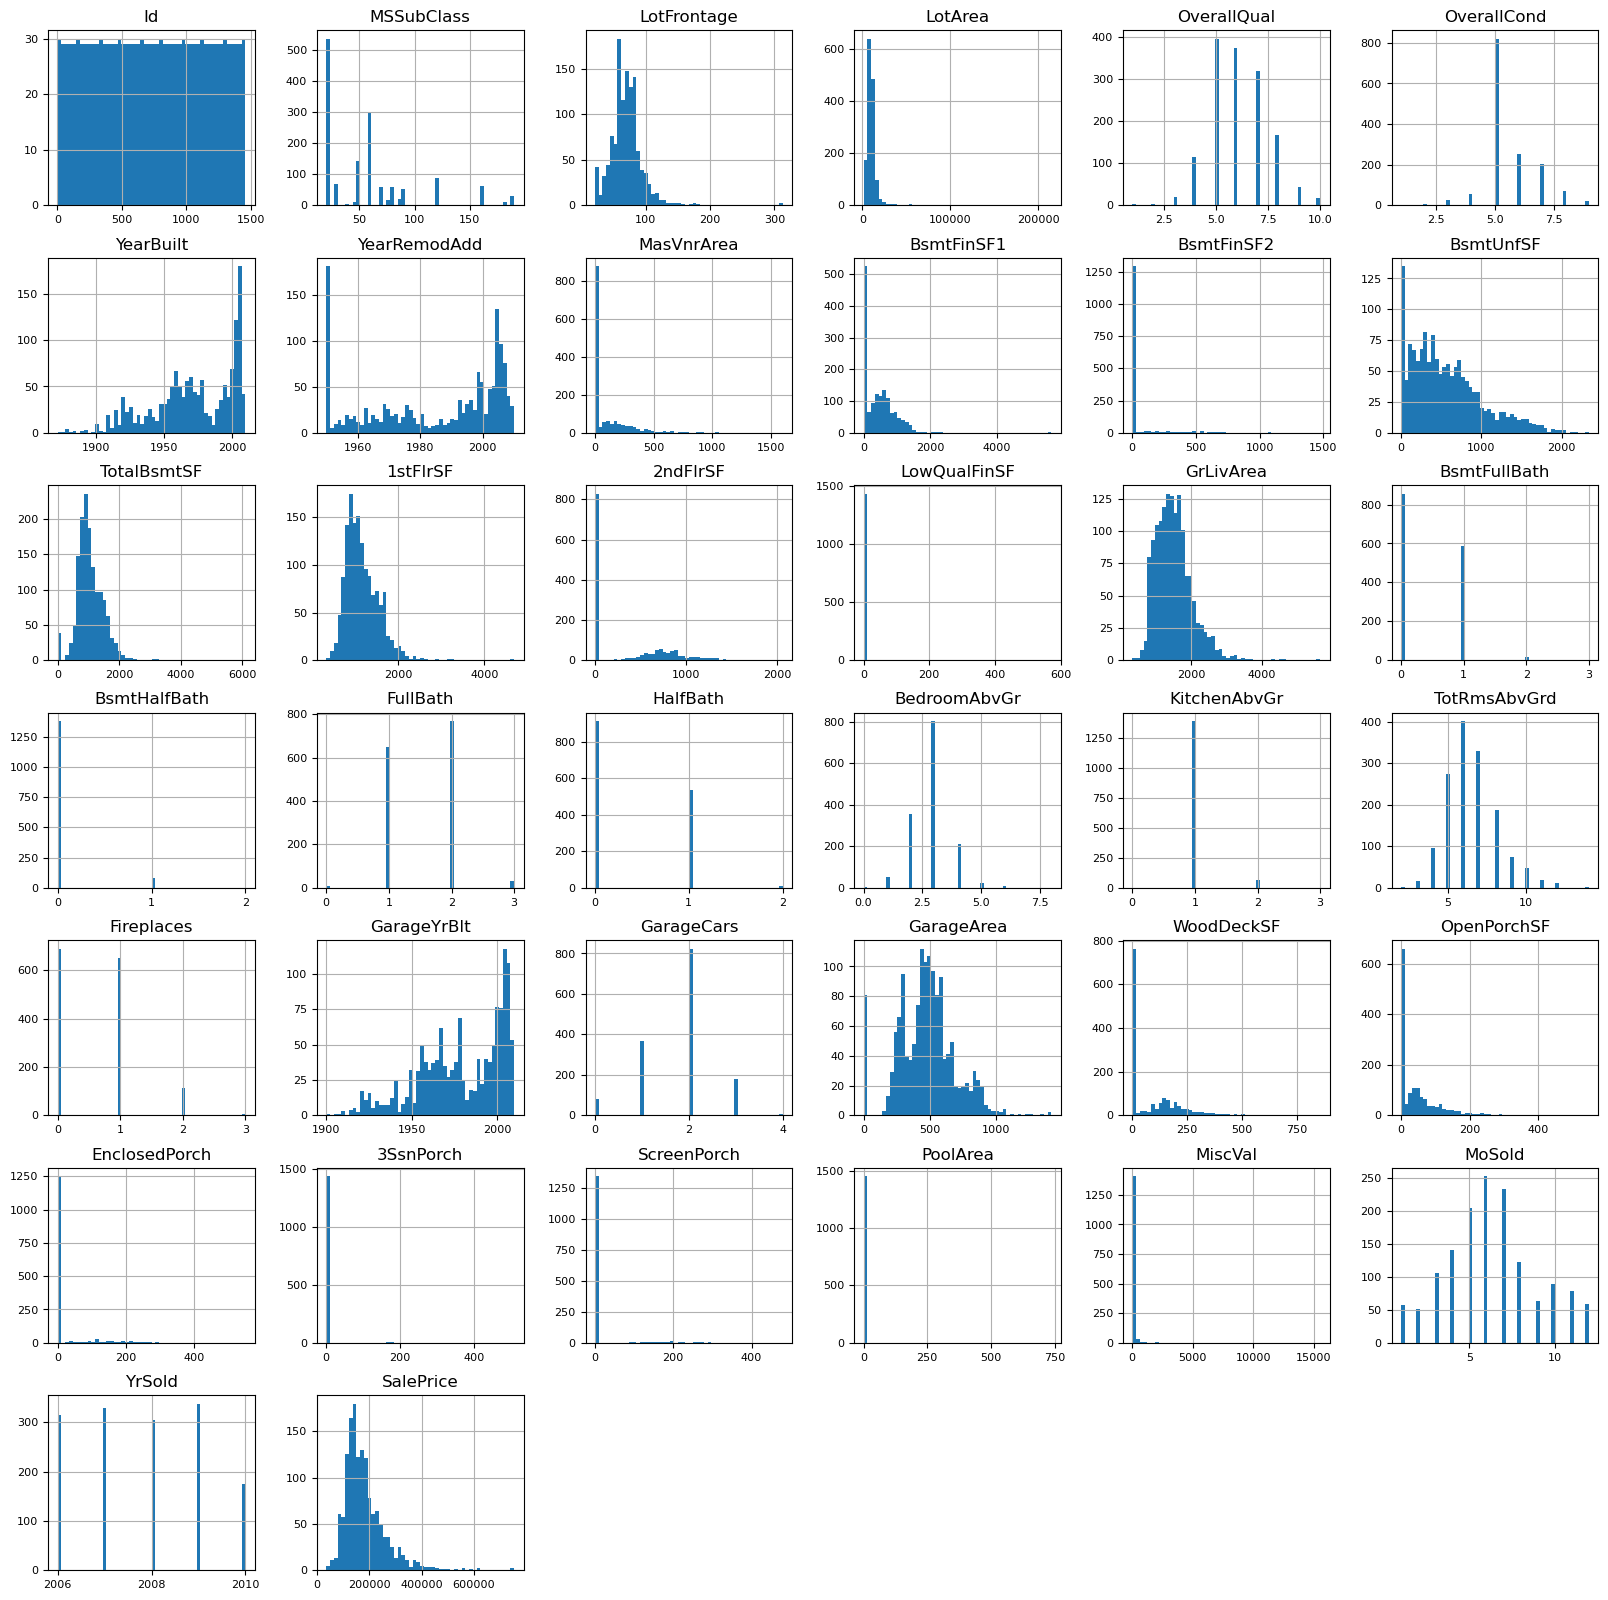

In [6]:
df_num.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [9]:
# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

In [10]:
# Define features (X) and target variable (y)
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

In [11]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Initialize models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
lr_model = LinearRegression()
svr_model = SVR()

In [16]:
# Train models
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [17]:
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [18]:
svr_model.fit(X_train_scaled, y_train)

SVR()

In [20]:
# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_svr = svr_model.predict(X_test_scaled)

In [21]:
# Evaluate models
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))

In [23]:
print(f"Random Forest RMSE: {rmse_rf}")
print(f"Linear Regression RMSE: {rmse_lr}")
print(f"SVR RMSE: {rmse_svr}")

Random Forest RMSE: 29310.89950966768
Linear Regression RMSE: 182242308637.5473
SVR RMSE: 88647.1940698108


In [24]:
# Function to prepare new house data
def prepare_house_data(features, scaler):
    df_test = pd.DataFrame([features])
    df_test = pd.get_dummies(df_test)
    df_test = df_test.reindex(columns=X.columns, fill_value=0)
    df_test_scaled = scaler.transform(df_test)
    return df_test_scaled

In [25]:
# Example test case
house_test_case = {
    'OverallQual': 7,
    'GrLivArea': 1800,
    'GarageCars': 2,
    'TotalBsmtSF': 900,
    'YearBuilt': 2000,
    'FullBath': 2,
    'KitchenQual_Ex': 1  # Example of a one-hot encoded categorical feature
}

In [26]:
test_case_scaled = prepare_house_data(house_test_case, scaler)

In [27]:
pred_rf = rf_model.predict(test_case_scaled)[0]
pred_lr = lr_model.predict(test_case_scaled)[0]
pred_svr = svr_model.predict(test_case_scaled)[0]

In [28]:
print("Predictions for the test house:")
print(f"Random Forest: ${pred_rf:.2f}")
print(f"Linear Regression: ${pred_lr:.2f}")
print(f"SVR: ${pred_svr:.2f}")


Predictions for the test house:
Random Forest: $175074.99
Linear Regression: $-8333534612329324.00
SVR: $164973.93


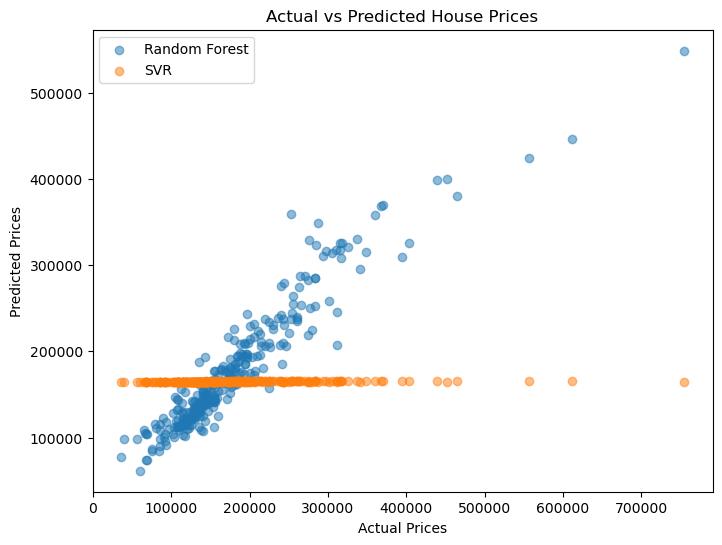

In [44]:
# Scatter plot of actual vs predicted prices
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Random Forest')
plt.scatter(y_test, y_pred_svr, alpha=0.5, label='SVR')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.show()